# Buổi 11: Thuật toán tìm đường (phần 1)

Giới thiệu về bài toán tìm đường
- Tìm đường là bài toán tìm kiếm đường đi để duyệt qua tất cả các đỉnh trong một đồ thị.
- Ứng dụng phổ biến nhất của thuật toán tìm đường là tìm đường đi trên bản đồ, như tìm đường cho các phương tiện khác nhau trên Google Maps.
- Tuy nhiên, ứng dụng của thuật toán tìm đường rất đa dạng: 
+ Tìm các bước để giải một khối rubik
+ Tìm đường để thoát khỏi mê cung
+ Xác định hướng truy đuổi cho các con "ma" trog game Pacman
+ Xác định các vật thể khác nhau trong một bức ảnh
+ Xác đình màu để tô cho các nước trên bản đồ sao cho sử dụng ít màu nhất
+ Xác định lộ trình khám phá cho robot trên hành tinh khác sao cho không bị mắc kẹt hoặc rơi xuống vực.

## 1. Depth-First Search (DFS): Tìm kiếm theo chiều sâu
**DFS** là thuật toán duyệt qua các đỉnh trong một đồ thị với tư tưởng: Bắt đầu từ một đỉnh bất kỳ, duyệt theo các đỉnh kề để đến đỉnh xa nhất có thể trên mỗi nhánh, sau đó lại trở lại các điểm rẽ nhánh và tiếp tục duyệt.

**Thuật toán** duyệt của DFS: 
1. Duyệt đỉnh xuất phát, đánh dấu đỉnh xuất phát đã được duyệt
2. Xét các đỉnh kề với đỉnh đang duyệt:
    2.1. Nếu đỉnh đang xét chưa được duyệt => duyệt đỉnh đang xét
    2.2. Nếu đỉnh đang xét đã được duyệt => bỏ qua 

### Code
DFS Chính là thuật toán được dùng để duyệt cây và đồ thị ở bài trước: Bắt đầu từ một đỉnh, ta lần theo các cạnh để đi đến các đỉnh liền kề. Khi hết đường, ta quay lại đường đã đi để tiếp tục duyệt các nhánh chưa đi qua.

In [1]:
def dfs_recursive(vertex, graph, visited): ## vertex coi đang = đỉnh 0
    
    # Đánh dấu đỉnh hiện tại đang duyệt
    visited.add(vertex)
    print(vertex, end=" ")
    
    # đi qua các nhanh liền kề
    for next_vertex in graph[vertex]: # 0: [1, 2]
        if next_vertex not in visited: # kiểm tra đỉnh next_vertex đã duyệt hay chưa
            dfs_recursive(next_vertex, graph, visited)
            

# Di chuyển đồ thị từ đỉnh bắt đầu
def dfs(graph, start):
    print("Treverse path: ", end = "")
    dfs_recursive(start, graph, set()) ### mặc định phải là set(): set giúp xóa bỏ phần tử trùng lặp.
    

In [4]:
graph = {
    0: [1, 2],
    1: [3],
    2: [3],
    3: [4],
    4: []
}

# In ra thứ tự duyệt các đỉnh của DFS trên đồ thị 
dfs(graph, 0)

Treverse path: 0 1 3 4 2 

Đặc điểm:
- Thuật toán DFS không đảm bảo tìm được đường đi ngắn nhất giữa hai đỉnh
- Để tránh bị tràn bộ nhớ do đệ quy, ta có thể dùng CTDL stack để lưu các đỉnh cần thăm tiếp theo

## 2. Thực hành
### 2.1 In biểu thức
Yêu cầu: Cho một cây biểu thứ với các toán tử hai ngôi như hình dưới, hãy dùng thuật toán DFS để in ra biểu thức dạng: "prefix", "postfix', 'infix' từ cây trên.

Kết quả hiển thị
- prefix:   + 3 * + 5 9 2
- Postfix:  3 5 9 + 2 * + 
- Infix:    (3 + ((5 + 9) * 2))

Cây biểu thức và hàm in biểu thức prefix đã được cho sẵn bên dưới, hãy viết hàm in ra biểu thức dạng postfix, infix

Lưu ý: Dùng các dấu ngoặc ở mỗi phép tính trong biểu thức infix để đảm bảo các phép tính được thực hiện đúng thứ tự

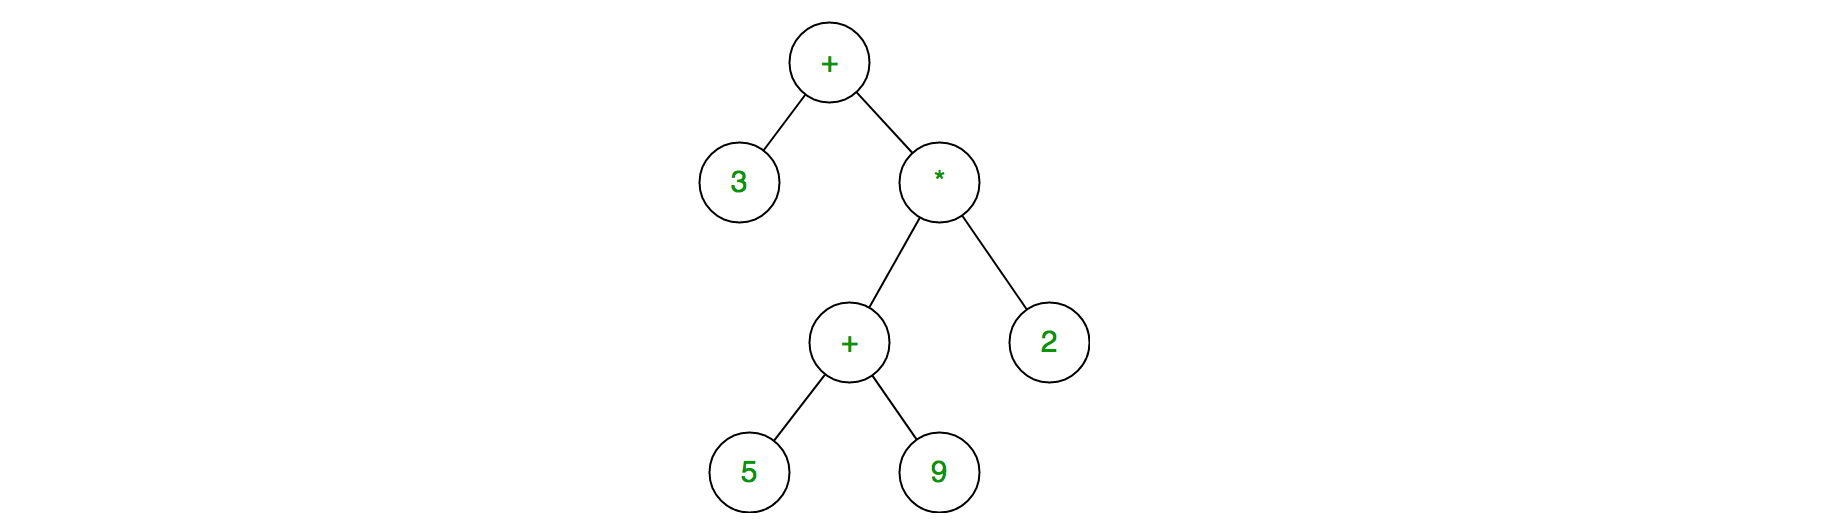

In [5]:
class Node: 
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        
        
root = Node('+')
root.left, root.right = Node(3), Node("*")
root.right.left, root.right.right = Node("+"), Node(2)
root.right.left.left, root.right.left.right = Node(5), Node(9)
 
    
    
def print_prefix(node):
    print(node.data, end=" ")
    
    if node.left is not None:
        print_prefix(node.left)
        print_prefix(node.right)

print("Prefix: ", end="")
print_prefix(root)
        

Prefix: + 3 * + 5 9 2 